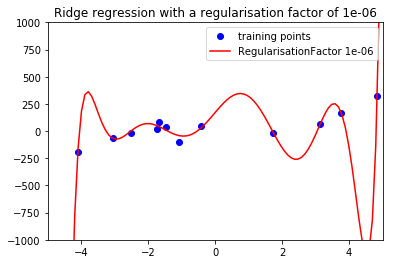

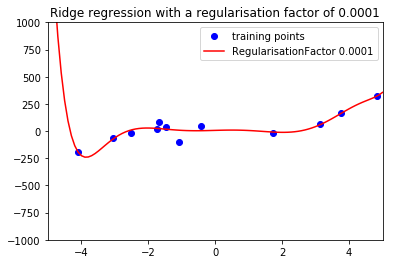

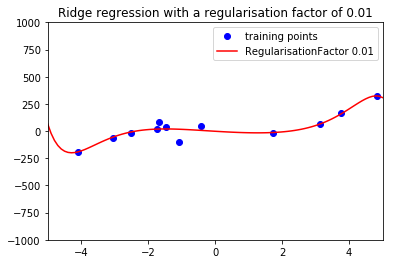

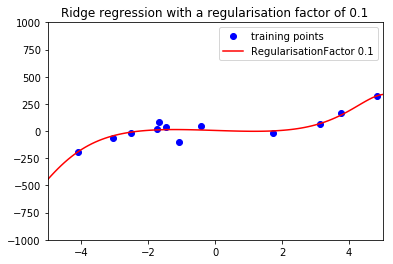

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def input(train1, test1): #Takes csv files and imports them as dataframes
    #data_train = pd.DataFrame.from_csv(train1)  
    #data_plot = pd.DataFrame.from_csv(test1)
    data_train = pd.read_csv(train1)
    data_plot = pd.read_csv(test1, index_col=None)
    return data_train, data_plot


def trainassess (d_train, d_plot): #Importing the x,y and features from training. Importing x and Features from plotting
    x_train = d_train['x'].values
    y_train = d_train['y'].values
    f_train = d_train.iloc[:, 3:15].values
    x_plot =  d_plot['x'].values
    f_plot = d_plot.iloc[:, 2:14].values
    #print(f_plot)
    return  x_train, y_train, f_train, x_plot, f_plot


def ridge_regression(features_train, y_train, regularisationFactor): #Completes Ridge Regression equation
   
    parameters = features_train.transpose().dot(features_train)
    parameters = parameters + (regularisationFactor * (np.identity(parameters.shape[1])))
    parameters2 = features_train.transpose().dot(y_train)
    parameters = np.linalg.solve(parameters, parameters2)  
    return parameters

def rid_reg_plot(f_plot, parameters): #Calculate the predicted Y values by dot producting features with weights
   i = 0
   y_calc_plot = np.zeros(len(f_plot))
   while i < len(f_plot):
       curr_feat = f_plot[i, :]
       y_calc_plot[i] = curr_feat.dot(parameters)
       i+=1
   return  y_calc_plot

def points_plot(x_train, y_train, x_plot, y_calc_plot, regfact): #Plotting of the training and plot data
    plt.figure()
    #plt.clf()
    plt.plot(x_train, y_train, 'bo')
    plt.plot(x_plot, y_calc_plot, 'r')
    #plt.plot(train[0],train[0], 'go')
    plt.legend(('training points', 'RegularisationFactor ' + str(regfact)))
    plt.title('Ridge regression with a regularisation factor of ' + str(regfact))
    plt.xlim((-5, 5))
    plt.ylim((-1000, 1000))
    #plt.hold(True)
    plt.savefig('RidgeRegPlot' + str(regfact)+ '.png')
    plt.show()
    



reg_fact_train = np.array([0.000001, 0.0001, 0.01, 0.1]) #10-6, 10-4, 10-2, 10-1
(d_tr, d_pl) = input('regression_train_assignment2019.csv', 'regression_plotting_assignment2019.csv')
i = 0
(tr_x, tr_y, tr_f, pl_x, pl_f) = trainassess(d_tr, d_pl)
#(x_tr, y_tr, tr_a) = trainassess(d_tr)
for regs in reg_fact_train:
    (par) = ridge_regression(tr_f, tr_y, regs) 
    (pl_y) = rid_reg_plot(pl_f, par)
    points_plot(tr_x, tr_y, pl_x, pl_y, regs)
    i+=1




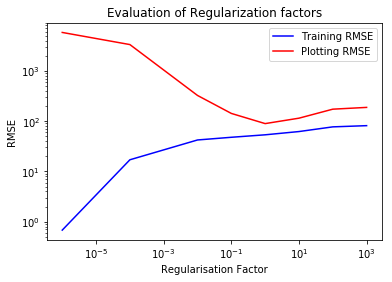

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def input(train1, test1): #Takes csv files and imports them as dataframes
    #data_train = pd.DataFrame.from_csv(train1)
    #data_plot = pd.DataFrame.from_csv(test1)
    data_train = pd.read_csv(train1)
    data_plot = pd.read_csv(test1, index_col=None)
    return data_train, data_plot

def randomtrain(input_train): #Randomises which part of the train file will be used for training or plotting
    length = len(input_train)
    #np.random.shuffle(input_train[0])
    output = input_train.sample(frac=1)
    seventy = int(round(0.7*(length)))
    #print(seventy)
    output_train = output[0:seventy]
    output_plot = output[seventy:length]
    return output_train, output_plot

def traineval(d_tr, d_pl): #Importing the correct data (features) from the train file specifically
    x_train = d_tr['x'].values
    y_train = d_tr['y'].values
    f_train = d_tr.iloc[:, 3:15].values
    x_plot =  d_pl['x'].values
    y_plot = d_pl['y'].values
    f_plot = d_pl.iloc[:, 3:15].values
    return  x_train, y_train, f_train, x_plot, y_plot, f_plot

def ridge_regression(features_train, y_train, regularisationFactor): #Computes the weights for the training features
   
    parameters = features_train.transpose().dot(features_train)
    parameters = parameters + (regularisationFactor * (np.identity(parameters.shape[1])))
    parameters2 = features_train.transpose().dot(y_train)
    parameters = np.linalg.solve(parameters, parameters2)  
    return parameters

def eval_regression(parameters, features, y): #Calculates the y hat value and then compares it to y to calculate the rmse
    i = 0
    y_comp = np.zeros(len(features))
    while i < len(features):
        curr_feat = features[i, :]
        y_comp[i] = curr_feat.dot(parameters)
        i+=1
    sq_er = np.square(y - y_comp)
    mean_sq_er = np.mean(sq_er)
    rmse =  np.sqrt(mean_sq_er)
    return rmse

def plotting_rmse(reg_fact_train, train_rmse, reg_fact_eval, test_rmse): #Plots RMSE of both training and testing data
    plt.figure()
    plt.loglog(reg_fact_train, train_rmse, 'b')
    plt.loglog(reg_fact_eval, test_rmse, 'r')
    plt.title('Evaluation of Regularization factors')
    plt.legend(('Training RMSE', 'Plotting RMSE'))
    plt.xlabel('Regularisation Factor')
    plt.ylabel('RMSE')
    plt.savefig('RMSEdata.png')
    plt.show()

reg_fact_eval = np.array([0.000001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000])
(d_tr, d_pl) = input('regression_train_assignment2019.csv', 'regression_plotting_assignment2019.csv')
train_rmse = np.zeros(len(reg_fact_eval))
test_rmse = np.zeros(len(reg_fact_eval))
(d_tr_rand, d_pl_rand) = randomtrain(d_tr)
(tr_x, tr_y, tr_f, pl_x, pl_y, pl_f) = traineval(d_tr_rand, d_pl_rand)

j = 0
for regs in reg_fact_eval:
    (par) = ridge_regression(tr_f, tr_y, regs)
    (train_rmse[j]) = eval_regression(par, tr_f, tr_y)
    (test_rmse[j]) = eval_regression(par, pl_f, pl_y)
    j+=1

plotting_rmse(reg_fact_eval, train_rmse, reg_fact_eval, test_rmse)

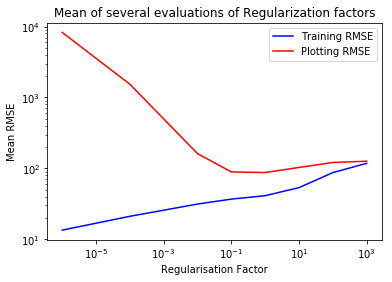

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def input(train1, test1): #Takes csv files and imports them as dataframes
    #data_train = pd.DataFrame.from_csv(train1) #Import from 
    #data_plot = pd.DataFrame.from_csv(test1)
    data_train = pd.read_csv(train1)
    data_plot = pd.read_csv(test1, index_col=None)
    return data_train, data_plot

def randomtrain(input_train): #Randomises which part of the train file will be used for training or plotting
    length = len(input_train)
    #np.random.shuffle(input_train[0])
    output = input_train.sample(frac=1)
    seventy = int(round(0.7*(length)))
    output_train = output[0:seventy]
    output_plot = output[seventy:length]
    return output_train, output_plot

def traineval(d_tr, d_pl): #Importing the correct data (features) from the train file specifically
    x_train = d_tr['x'].values
    y_train = d_tr['y'].values
    f_train = d_tr.iloc[:, 3:15].values
    x_plot =  d_pl['x'].values
    y_plot = d_pl['y'].values
    f_plot = d_pl.iloc[:, 3:15].values
    return  x_train, y_train, f_train, x_plot, y_plot, f_plot


def eval_regression(parameters, features, y): #Calculates the y hat value and then compares it to y to calculate the rmse
    i = 0
    y_comp = np.zeros(len(features))
    while i < len(features):
        curr_feat = features[i, :]
        y_comp[i] = curr_feat.dot(parameters)
        i+=1
    sq_er = np.square(y - y_comp)
    mean_sq_er = np.mean(sq_er)
    rmse =  np.sqrt(mean_sq_er)
    return rmse

def plotting_rmse(reg_fact_train, train_rmse, reg_fact_eval, test_rmse):
    plt.figure()
    plt.loglog(reg_fact_train, train_rmse, 'b')
    plt.loglog(reg_fact_eval, test_rmse, 'r')
    plt.title('Mean of several evaluations of Regularization factors')
    plt.legend(('Training RMSE', 'Plotting RMSE'))
    plt.xlabel('Regularisation Factor')
    plt.ylabel('Mean RMSE')
    plt.savefig('RMSEDataMean.png')
    plt.show()

reg_fact_eval = np.array([0.000001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000])
rmse_num = 10
train_rmse = np.zeros(len(reg_fact_eval))
test_rmse = np.zeros(len(reg_fact_eval))
#tr_rmse_mean = np.zeros((rmse_num, len(reg_fact_eval)))
tr_rmse_mean = np.zeros(len(reg_fact_eval))
#te_rmse_mean = np.zeros((rmse_num, len(reg_fact_eval)))
te_rmse_mean = np.zeros(len(reg_fact_eval))
i=0
while i < rmse_num:
    (d_tr, d_pl) = input('regression_train_assignment2019.csv', 'regression_plotting_assignment2019.csv')
    (d_tr, d_pl) = randomtrain(d_tr)
    (tr_x, tr_y, tr_f, pl_x, pl_y, pl_f) = traineval(d_tr, d_pl)
    j = 0
    for regs in reg_fact_eval:
        (par) = ridge_regression(tr_f, tr_y, regs)
        (train_rmse[j]) = eval_regression(par, tr_f, tr_y)
        (test_rmse[j]) = eval_regression(par, pl_f, pl_y)
        tr_rmse_mean[j] += train_rmse[j]
        te_rmse_mean[j] += test_rmse[j]
        j+=1
    i+=1
tr_mean = tr_rmse_mean / rmse_num
te_mean = te_rmse_mean / rmse_num
#tr_mean = np.mean                       
plotting_rmse(reg_fact_eval, tr_mean, reg_fact_eval, te_mean)